<a href="https://colab.research.google.com/github/pksi/coding_interview/blob/main/nvidia_coding_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
# Generate the data of 10 atoms in 3D space
atoms=torch.randint(0,100,(10,3))
atoms

tensor([[90, 86, 26],
        [24, 30, 47],
        [64, 50, 23],
        [86, 97, 56],
        [ 9, 22, 27],
        [67, 11, 16],
        [52,  4, 16],
        [70, 33, 11],
        [63, 90, 78],
        [78, 44, 46]])

## Calcualte the distance distribution of all atoms

In [ ]:
import math
distances = []
for i in range (atoms.shape[0]):
    for j in range (atoms.shape[0]):
      if j>i:
        distance = math.sqrt((atoms[i,0]-atoms[j,0])**2+(atoms[i,1]-atoms[j,1])**2+(atoms[i,2]-atoms[j,2])**2)
        distances.append(distance)
      else:
        continue

(array([ 3.,  5.,  3.,  6., 11.,  2.,  4.,  4.,  3.,  4.]),
 array([ 16.55294536,  26.03093425,  35.50892315,  44.98691205,
         54.46490095,  63.94288984,  73.42087874,  82.89886764,
         92.37685654, 101.85484543, 111.33283433]),
 <BarContainer object of 10 artists>)

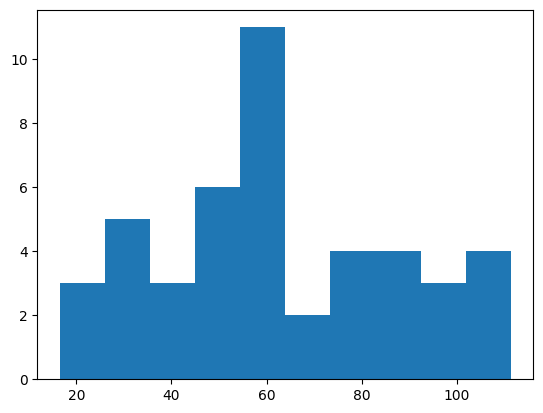

In [ ]:
import matplotlib.pyplot as plt
plt.hist(distances)

## Build a model to predict nucleic acid locations in protein

In [ ]:
torch.manual_seed = 21
nuc_acid=torch.randint(0,100,(10,3))
nuc_acid

tensor([[56, 59, 24],
        [35, 28, 85],
        [70, 76, 68],
        [11, 24, 68],
        [17, 72, 88],
        [ 1, 12, 18],
        [60, 36, 93],
        [92, 83, 67],
        [47, 41, 67],
        [16, 39, 59]])

In [ ]:
torch.manual_seed = 42
protein=torch.randint(0,100,(10,3))
protein

tensor([[87,  9, 90],
        [76, 83, 87],
        [82,  6, 49],
        [88, 54, 23],
        [65, 74, 50],
        [80, 48, 94],
        [87, 14, 55],
        [96, 53, 42],
        [35, 59, 85],
        [ 6, 84, 85]])

In [ ]:
from torch import nn
class ProteinModel(nn.Module):
  def __init__(self) -> None:
      super().__init__()
      self.layers=nn.Sequential(
          nn.Linear(in_features=3,out_features=10),
          nn.ReLU(),
          nn.Linear(in_features=10,out_features=3),
          nn.ReLU()
      )
  def forward (self,x):
      return self.layers(x)

In [ ]:
model=ProteinModel()

In [ ]:
nuc_acid=nuc_acid.type(torch.float)
protein = protein.type(torch.float)

In [ ]:
model(nuc_acid)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], grad_fn=<ReluBackward0>)

## Create a function to train the model

In [ ]:
device = "cuda" if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
loss_fn= nn.MSELoss()

In [ ]:
optimizer = torch.optim.Adam (lr=0.01,params=model.parameters())

In [ ]:
torch.manual_seed = 42
model.to(device)
nuc_acid,protein=nuc_acid.to(device),protein.to(device)

epochs = 30
for epoch in range(epochs):
  model.train()
  pred=model(nuc_acid)
  loss=loss_fn(pred,protein)
  print(epoch,loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [ ]:
# Create a train model function
def train_model(model,input,target,loss_fn,optimizer,epochs):
  for epoch in range(epochs):
    model.train()
    output=model(input)
    loss=loss_fn(output,target)
    print(epoch,loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
train_model(model,nuc_acid,protein,loss_fn=loss_fn,optimizer=optimizer,epochs=30)

In [ ]:
# Include L2 regularizaiton
weight_decay = 0.01
optimizer = torch.optim.Adam(lr=0.001,params=model.parameters(),weight_decay=weight_decay)

In [ ]:
# Use model for prediction
model.eval()
with torch.inference_mode():
  prediction = model(nuc_acid)

## Vector meansurement in video

In [ ]:
video = []
for i in range (10):
  torch.manual_seed = i
  t=torch.randint(0,100,(10,2))
  video.append(t)

In [ ]:
directions = []
for i in range (1,10):
  diff=video[i]-video[i-1]
  directions.append(diff)

In [ ]:
len(directions)

9

In [ ]:
directions[0]

tensor([[-41,  50],
        [-25, -60],
        [ 51, -23],
        [ 37, -11],
        [ 14,  33],
        [ 68,  -3],
        [ 44,  26],
        [-58,   7],
        [-67, -69],
        [ -9,   0]])

## Minimum displacement from nucleic acid to protein

In [ ]:
min_disp = []
for i in range (nuc_acid.shape[0]):
  distances = []
  for j in range (protein.shape[0]):
    distance = math.sqrt((nuc_acid[i,0]-protein[j,0])**2+(nuc_acid[i,1]-protein[j,1])**2+(nuc_acid[i,2]-protein[j,2])**2)
    distances.append(distance)
  min_disp.append(np.min(distances))

In [ ]:
min_disp

[31.336879231984796,
 31.0,
 18.788294228055936,
 45.71651780264984,
 16.55294535724685,
 86.93675862372602,
 23.345235059857504,
 25.612496949731394,
 28.142494558940577,
 37.907782842049734]

## Data Augmentation (Equalvairance converstion)

In [ ]:
node_features = torch.tensor([[0.1, 0.2, 0.3],
                              [0.4, 0.5, 0.6],
                              [0.7, 0.8, 0.9],
                              [1.0, 1.1, 1.2]], dtype=torch.float32)

In [ ]:
permutation = torch.randperm(node_features.size(0))

In [ ]:
shuffled_node_features = node_features[permutation]
shuffled_node_features

tensor([[1.0000, 1.1000, 1.2000],
        [0.4000, 0.5000, 0.6000],
        [0.7000, 0.8000, 0.9000],
        [0.1000, 0.2000, 0.3000]])

## One-hot coding

In [ ]:
nodes = [1,2,3,4,5]
one_hot = torch.eye(len(nodes)+1)[nodes]

In [ ]:
one_hot

tensor([[0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.]])

## Circle target problem

### Create a loss function to calcualte how many points are outside the circle

In [ ]:
import torch
sample=torch.randint(0,100,(100,2))
sample

In [4]:
import math
out_targe_pt = 0
for i in range (len(sample)):
  if math.sqrt((sample[i][0]-30)**2+(sample[i][1]-50)**2)>15:
    out_targe_pt+=1
out_targe_pt

96

In [6]:
def loss_fn1 (pred):
  out_targe_pt = 0
  for i in range (len(pred)):
    if math.sqrt((pred[i][0]-30)**2+(pred[i][1]-50)**2)>15:
      out_targe_pt+=1
  return out_targe_pt

In [7]:
loss_fn1(sample)

96

### Create a loss function to minimize the total displacement

In [8]:
def loss_fn2 (sample,pred):
  total_disp = 0
  for i in range (len(pred)):
    disp=math.sqrt((pred[i][0]-sample[i][0])**2+(pred[i][1]-sample[i][0])**2)
    total_disp+=disp
  return loss_fn1 (pred)+total_disp

## 2D samples

In [ ]:
torch.manual_seed=21
sample1=torch.randint(0,100,(50,50,2))
sample1

In [ ]:
torch.manual_seed=42
sample2=torch.randint(0,100,(50,50,2))
sample2

In [17]:
# Calculate the displacement of each point
diff = sample2-sample1
diff

tensor([[[ 26,  25],
         [-73, -13],
         [-39,  26],
         ...,
         [  3,   3],
         [ 53, -23],
         [ -2, -18]],

        [[ 53,  60],
         [-41,  74],
         [ 77,   5],
         ...,
         [-45,  56],
         [ 58, -47],
         [  5,   9]],

        [[ 23,  19],
         [ 76,  11],
         [ 12,  63],
         ...,
         [ 57, -66],
         [ 43, -55],
         [ 18,  37]],

        ...,

        [[-52,  22],
         [-79,  94],
         [ 14, -49],
         ...,
         [ 36, -43],
         [ 18,  48],
         [-26,  94]],

        [[ 52, -12],
         [-19,  37],
         [-66,  64],
         ...,
         [ 29, -15],
         [ 81, -38],
         [ 26, -79]],

        [[ 25,  77],
         [  1, -58],
         [-52,  21],
         ...,
         [ 10, -63],
         [ 58, -52],
         [ 11,   5]]])

## Convolution layer

In [ ]:
from torch import nn
conv2d = nn.Conv2d(in_channels=2,
                   out_channels=10,
                   kernel_size=3)

In [ ]:
layers = nn.Sequential(nn.Conv2d(in_channels=2,out_channels=10,kernel_size=3,padding=1),
                       nn.ReLU()
)